In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/Hi/Downloads/Data set 1 - Data set 1.csv") 
df

,Date,App,Usage (minutes),Notifications,Times Opened
0,07-08-2024,Instagram,81,24,57
1,08-08-2024,Instagram,90,30,53
2,26-08-2024,Instagram,112,33,17
3,22-08-2024,Instagram,82,11,38
4,12-08-2024,Instagram,59,47,16
...,...,...,...,...,...
195,10-08-2024,LinkedIn,22,12,5
196,23-08-2024,LinkedIn,5,7,1
197,18-08-2024,LinkedIn,19,2,5
198,26-08-2024,LinkedIn,21,14,1


preprocessing


In [19]:
df.info

<bound method DataFrame.info of            Date        App  Usage (minutes)  Notifications  Times Opened
0    07-08-2024  Instagram               81             24            57
1    08-08-2024  Instagram               90             30            53
2    26-08-2024  Instagram              112             33            17
3    22-08-2024  Instagram               82             11            38
4    12-08-2024  Instagram               59             47            16
..          ...        ...              ...            ...           ...
195  10-08-2024   LinkedIn               22             12             5
196  23-08-2024   LinkedIn                5              7             1
197  18-08-2024   LinkedIn               19              2             5
198  26-08-2024   LinkedIn               21             14             1
199  02-08-2024   LinkedIn               13              4             1

[200 rows x 5 columns]>

In [20]:

df.columns

Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened'], dtype='object')

In [21]:
df.describe

<bound method NDFrame.describe of            Date        App  Usage (minutes)  Notifications  Times Opened
0    07-08-2024  Instagram               81             24            57
1    08-08-2024  Instagram               90             30            53
2    26-08-2024  Instagram              112             33            17
3    22-08-2024  Instagram               82             11            38
4    12-08-2024  Instagram               59             47            16
..          ...        ...              ...            ...           ...
195  10-08-2024   LinkedIn               22             12             5
196  23-08-2024   LinkedIn                5              7             1
197  18-08-2024   LinkedIn               19              2             5
198  26-08-2024   LinkedIn               21             14             1
199  02-08-2024   LinkedIn               13              4             1

[200 rows x 5 columns]>

In [22]:
missingvalues=df.isnull().sum()
missingvalues

Date               0
App                0
Usage (minutes)    0
Notifications      0
Times Opened       0
dtype: int64

EXPLORATORY DATA ANALYSIS

<Axes: title={'center': 'Daily Usage over Time'}, xlabel='Date'>

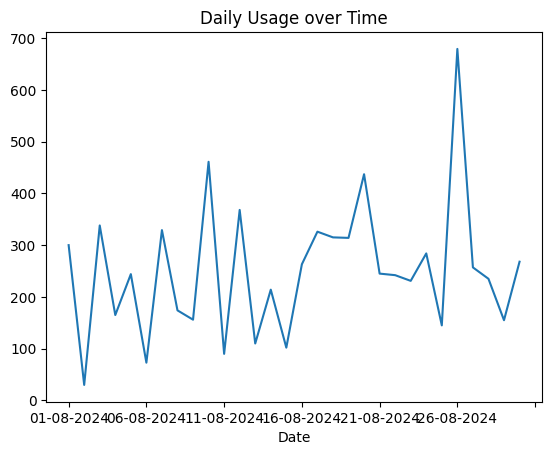

In [23]:
daily_usage = df.groupby('Date')['Usage (minutes)'].sum()
daily_usage.plot(kind='line', title='Daily Usage over Time')


<Axes: title={'center': 'Times Opened vs. Usage'}, xlabel='Times Opened', ylabel='Usage (minutes)'>

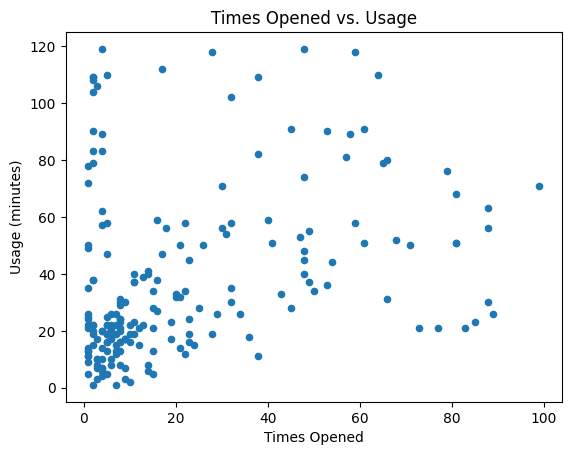

In [24]:
df.plot(kind='scatter', x='Times Opened', y='Usage (minutes)', title='Times Opened vs. Usage')


<Axes: title={'center': 'Notifications vs. Usage'}, xlabel='Notifications', ylabel='Usage (minutes)'>

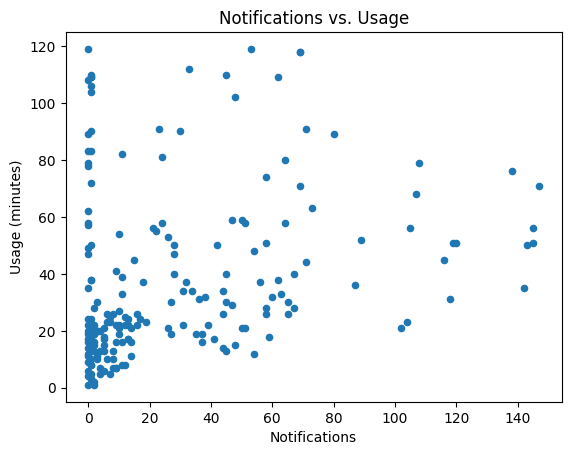

In [25]:
df.plot(kind='scatter', x='Notifications', y='Usage (minutes)', title='Notifications vs. Usage')


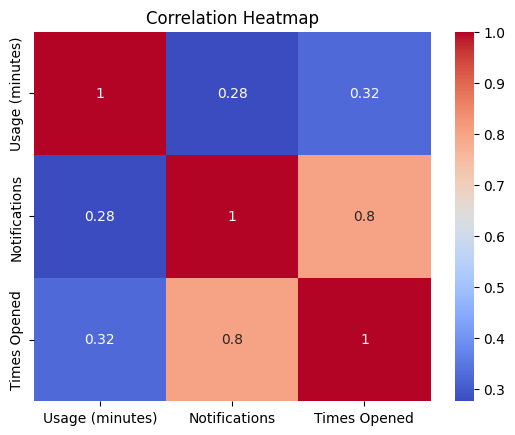

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[['Usage (minutes)', 'Notifications', 'Times Opened']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


<Axes: title={'center': 'Total Usage per App'}, xlabel='Usage (minutes)', ylabel='App'>

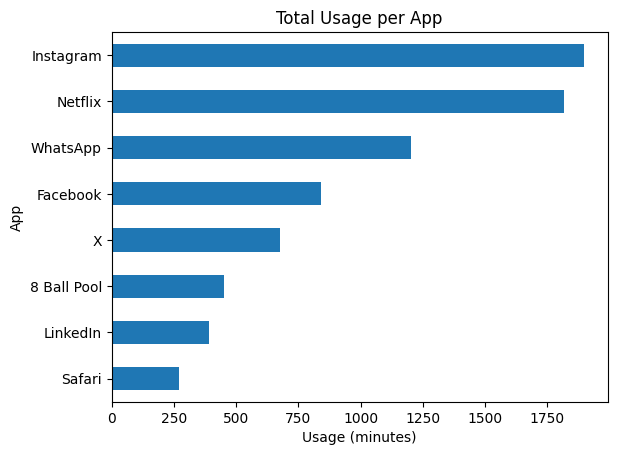

In [27]:
app_usage = df.groupby('App')['Usage (minutes)'].sum().sort_values()
app_usage.plot(kind='barh', title='Total Usage per App', xlabel='Usage (minutes)')

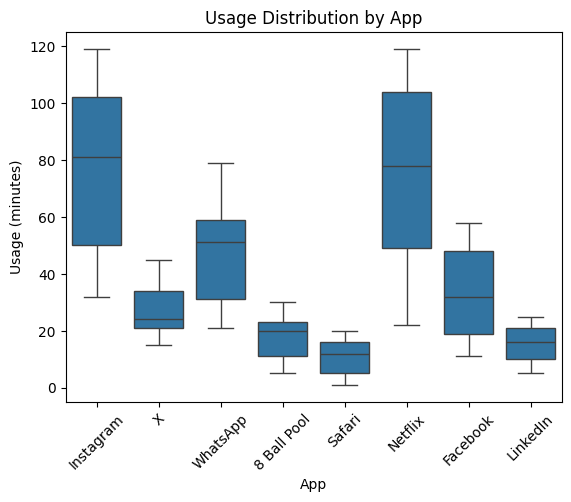

In [28]:
sns.boxplot(x='App', y='Usage (minutes)', data=df)
plt.title('Usage Distribution by App')
plt.xticks(rotation=45)
plt.show()


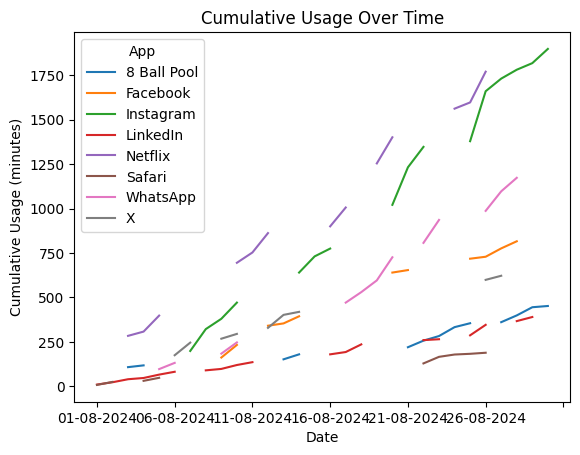

In [29]:
cumulative_usage = df.groupby(['Date', 'App'])['Usage (minutes)'].sum().groupby(level=1).cumsum().unstack()
cumulative_usage.plot(title='Cumulative Usage Over Time')
plt.ylabel('Cumulative Usage (minutes)')
plt.show()

see long-term trends and identify apps with growing or declining popularity.

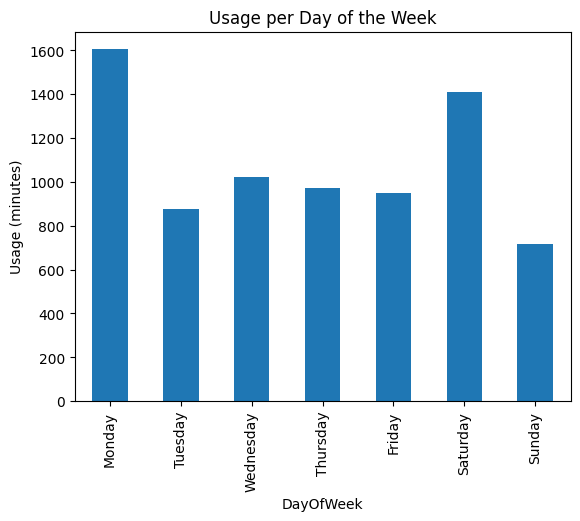

In [30]:
# Convert the 'Date' column to datetime with dayfirst=True
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract the day of the week
df['DayOfWeek'] = df['Date'].dt.day_name()

# Group by 'DayOfWeek' to analyze usage by day of the week
weekday_usage = df.groupby('DayOfWeek')['Usage (minutes)'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot the usage per day of the week
weekday_usage.plot(kind='bar', title='Usage per Day of the Week', ylabel='Usage (minutes)')
plt.show()


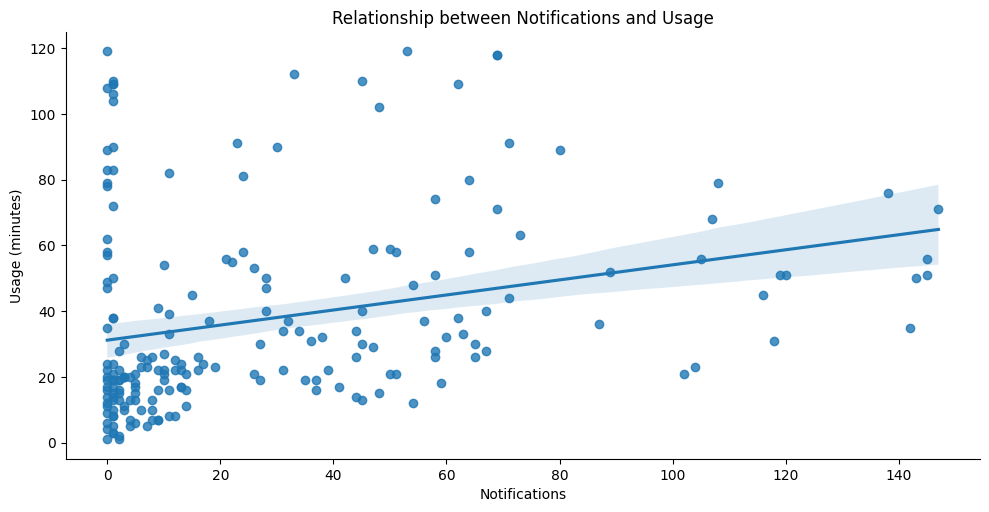

In [31]:
sns.lmplot(x='Notifications', y='Usage (minutes)', data=df, aspect=2)
plt.title('Relationship between Notifications and Usage')
plt.show()

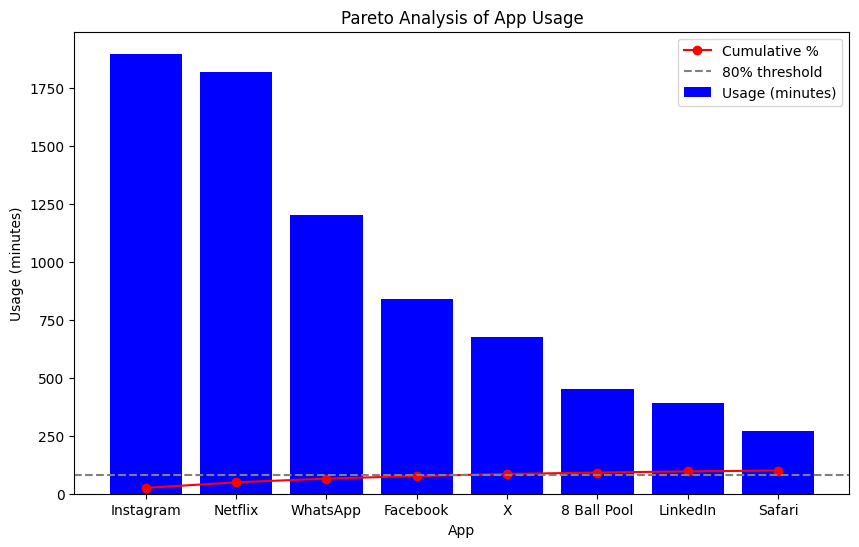

In [32]:
app_usage = df.groupby('App')['Usage (minutes)'].sum().sort_values(ascending=False)
cumulative_usage = app_usage.cumsum() / app_usage.sum() * 100

plt.figure(figsize=(10, 6))
plt.bar(app_usage.index, app_usage, color='blue', label='Usage (minutes)')
plt.plot(app_usage.index, cumulative_usage, color='red', marker='o', label='Cumulative %')
plt.axhline(y=80, color='grey', linestyle='--', label='80% threshold')
plt.title('Pareto Analysis of App Usage')
plt.xlabel('App')
plt.ylabel('Usage (minutes)')
plt.legend()
plt.show()

Purpose: Pareto analysis helps identify the "vital few" by plotting cumulative usage for each app. This is particularly useful if 20% of the apps contribute to 80% of the usage.
Decision-Making Insight: This plot helps you focus on the apps responsible for most of the usage, informing decisions on which apps to prioritize for usage reduction efforts.

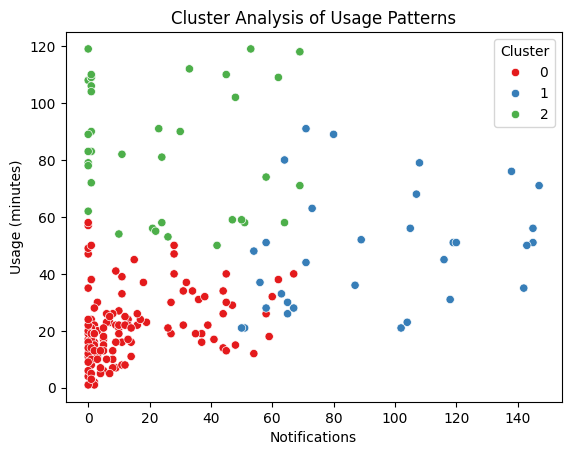

In [33]:
from sklearn.cluster import KMeans
df_clustering = df[['Usage (minutes)', 'Notifications', 'Times Opened']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_clustering)
df['Cluster'] = kmeans.labels_

sns.scatterplot(data=df, x='Notifications', y='Usage (minutes)', hue='Cluster', palette='Set1')
plt.title('Cluster Analysis of Usage Patterns')
plt.show()




Cluster 0 (Red):

Low Notifications, Low Usage
Cluster 1 (Blue):
Moderate to High Notifications, Moderate Usage
Possible User Behavior: This could represent users who receive many notifications but have moderate usage. They may be more engaged with social media but don’t necessarily increase usage time in proportion to notifications.
Cluster 2 (Green):
Moderate Notifications, High Usage: Points in this cluster generally show moderate notifications (between 10-40) and higher usage times (many above 60 minutes, going up to 120 minutes).
Possible User Behavior: These users might not receive as many notifications, but when they do, they spend more time on the app. They could represent users who have longer engagement times per session.
Insights for Decision-Making
Identifying High Usage: Cluster 2 contains users with high usage times. To reduce time spent, strategies could involve analyzing what drives prolonged engagement for users with moderate notifications.

Managing Notifications: Cluster 1 indicates that higher notifications don't necessarily lead to excessive usage time. Therefore, reducing notifications might not have a large impact on usage unless targeted at the right users.

Targeted Intervention: Each cluster represents different user engagement patterns, allowing for targeted interventions. For instance:

For Cluster 0: Minimal interventions might be needed.
For Cluster 1: Consider reducing notifications to observe any potential impact on usage time.
For Cluster 2: Consider limiting session durations or implementing usage caps, as these users are more prone to high usage times.
In summary, these clusters help segment user behavior, allowing for specific strategies to manage or reduce social media usage effectively based on observed patterns.











Ch